# Manipulation de séries financières avec la classe StockPrices

La classe [StockPrices](http://www.xavierdupre.fr/app/pyensae/helpsphinx/notebooks/pyensae%20StockPrices.html?highlight=stockprices) facilite la récupération de données financières via le site [Yahoo Finance](http://finance.yahoo.com/) ainsi que diverses opérations simples.

In [ ]:
import pyensae
from jyquickhelper import add_notebook_menu
add_notebook_menu()

In [ ]:
%pylab inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

Populating the interactive namespace from numpy and matplotlib


### Initialisation

In [ ]:
import pyensae
import os
from pyensae.finance import StockPrices
cache = os.path.abspath("cache")
if not os.path.exists(cache) : os.mkdir(cache)

### Créer un objet StockPrices

Le plus est d'utiliser le tick de la série financière utilisé par le site <a href="https://fr.finance.yahoo.com/">Yahoo Finance</a>.

In [ ]:
stock = StockPrices ("GLE.PA", folder = cache)
stock.head()

,Date,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,,
2000-01-03,2000-01-03,218.846,219.320,208.989,211.358,254000,136.0735
2000-01-04,2000-01-04,210.411,210.884,206.714,210.411,596100,135.4638
2000-01-05,2000-01-05,206.619,210.411,206.619,208.515,290600,134.2431
2000-01-06,2000-01-06,207.093,210.411,206.146,206.619,287800,133.0225
2000-01-07,2000-01-07,205.672,209.463,205.672,206.619,204100,133.0225


La classe <tt>StockPrices</tt> contient un objet <a href="http://pandas.pydata.org/pandas-docs/version/0.13.1/generated/pandas.DataFrame.html">pandas.DataFrame</a> auquel on accède en écrivant <tt>stock.dataframe</tt> ou <tt>stock.df</tt> :

In [ ]:
stock.dataframe.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close'], dtype='object')

De la même manière, on peut créer un objet <tt>StockPrices</tt> à partir d'un DataFrame :

In [ ]:
import pandas
data = [ {"Date":"2014-04-01", "Close":105.6}, {"Date":"2014-04-02", "Close":104.6}, {"Date":"2014-04-03", "Close":105.8}, ]
df = pandas.DataFrame(data)
stock = StockPrices("donnees",df)
stock.head()

,Close,Date
Date,,
2014-04-01,105.6,2014-04-01
2014-04-02,104.6,2014-04-02
2014-04-03,105.8,2014-04-03


### Quelques graphes

Premier dessin, on télécharge les données de BNP puis on dessine le cours de l'action.

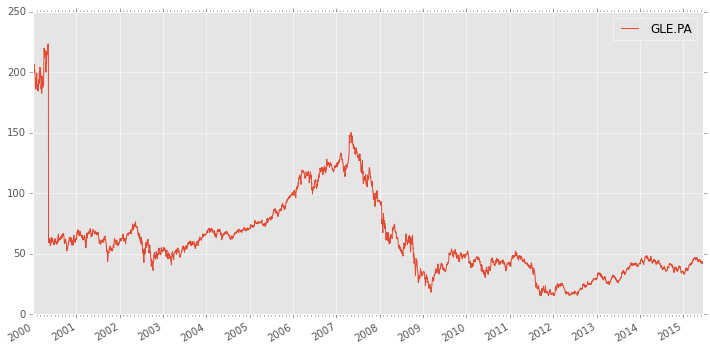

In [ ]:
stock = StockPrices ("GLE.PA", folder = cache)
ax= StockPrices.draw( stock, figsize=(12,6))

La série montre quelques problèmes de consistance durant l'année 2000.

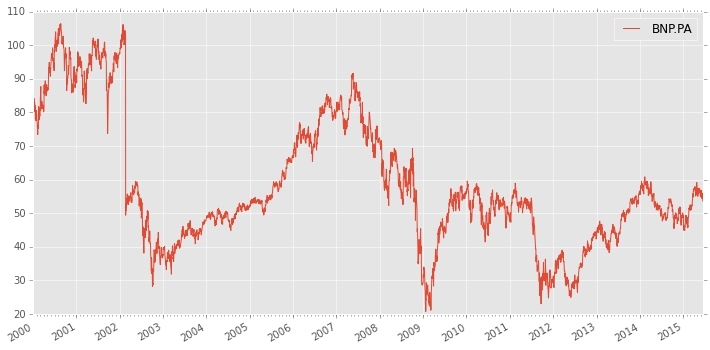

In [ ]:
stock = StockPrices ("BNP.PA", folder = cache)
StockPrices.draw( stock, figsize=(12,6))

La même chose se produit sur une autre série financière mais pas à la même date. On trace maintenant la série <b>Adj Close</b> définit
sur cette page : <a href="https://help.yahoo.com/kb/finance/historical-prices-sln2311.html?impressions=true">About historical prices</a>.

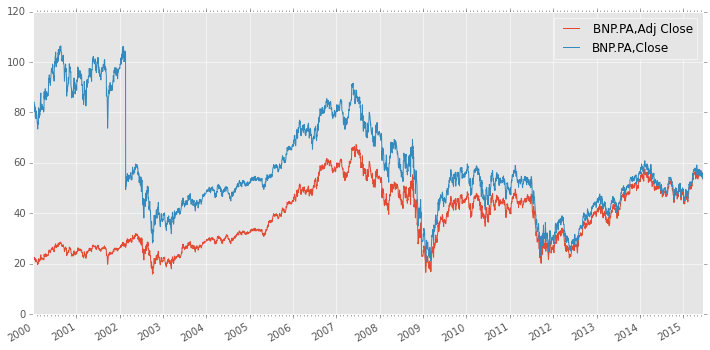

In [ ]:
stock = StockPrices ("BNP.PA", folder = cache)
StockPrices.draw( stock, field=["Adj Close", "Close"], figsize=(12,6))

Cette série ne fait pas apparaître ce saut de prix qui est survenu le <a href="http://invest.bnpparibas.com/fr/pid5900/en-bref.html">20 février 2002</a> lorsque le cours nominal de l'action a été divisé par deux pour augmenter la liquidité. Le nombre d'actions a été multiplié par deux. Le ratio <i>Adj Close/Close</i> peut être appliqué sur les séries <i>Open, High, Low</i> pour obtenir les séries ajustées (voir aussi cette <a href="http://compresse.bnpparibas.com/applis/wCorporate/wCorporate.nsf/viewAllPRelCodes/PVOI-579MTC/%24FILE/affichenominal.pdf">présentation</a>).

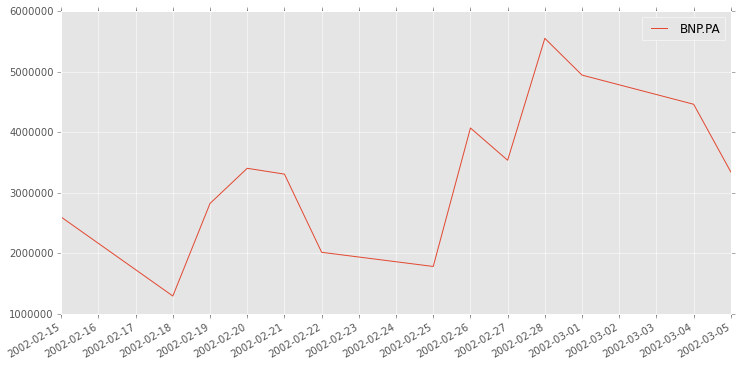

In [ ]:
stock = StockPrices ("BNP.PA", folder = cache)
df = stock["2002-02-15":"2002-03-05"]
StockPrices.draw( df, field="Volume", figsize=(12,6))

Le volume n'a pas l'air impacté ce qui porte à croire que celui-ci est exprimé en euros et non en nombre de titres échangés.

### Ajouter une seconde série sur un graphe

Dans l'exemple suivant, on trace une série financière puis on ajoute la série des rendements sur un second axe.

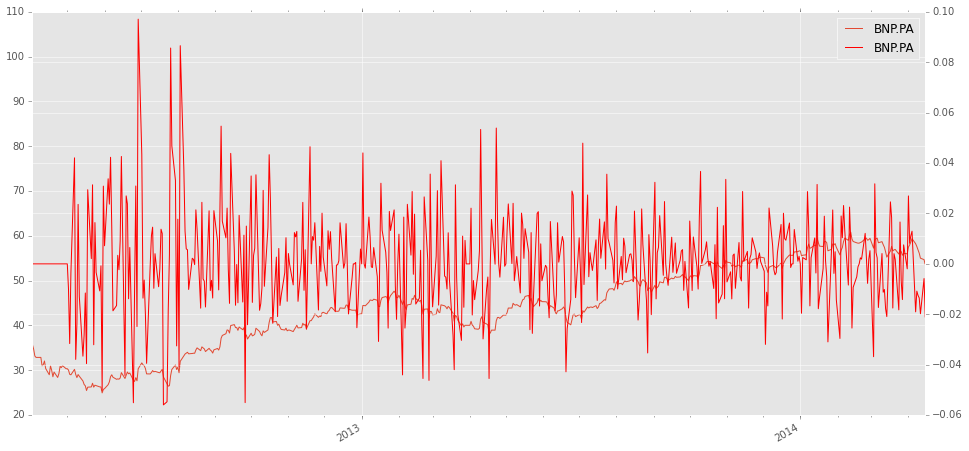

In [ ]:
stock = StockPrices ("BNP.PA")
ret   = stock.returns()["2012-04-01":"2014-04-15"]
ret.dataframe.ix["2012-04-01":"2012-04-30","Close"]=0  # on annule certains valeurs
ax = stock.plot(figsize=(16,8))
ret.plot(axis=2, ax=ax)

### Quelques opérations

In [ ]:
os.listdir(cache)

['BNP.PA.2000-01-03.2015-06-16.txt',
 'GLE.PA.2000-01-03.2015-06-15.txt',
 'GLE.PA.2000-01-03.2015-06-16.txt']

On affiche les dernières lignes.

In [ ]:
stock.tail()

,Date,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,,
2015-06-10,2015-06-10,54.16,56.05,53.94,55.56,3721300,55.56
2015-06-11,2015-06-11,55.32,56.59,55.19,56.02,3587400,56.02
2015-06-12,2015-06-12,55.90,56.18,54.52,55.30,3552400,55.30
2015-06-15,2015-06-15,54.41,54.94,53.51,53.96,3941500,53.96
2015-06-16,2015-06-16,53.56,54.08,52.79,53.67,4399700,53.67


On récupère la série des rendements.

In [ ]:
ret = stock.returns()
ret.tail()

,Date,Volume,Open,High,Low,Close,Adj Close
Date,,,,,,,
2015-06-10,2015-06-10,3721300,-0.006239,0.018906,0.005593,0.021511,0.021511
2015-06-11,2015-06-11,3587400,0.021418,0.009634,0.023174,0.008279,0.008279
2015-06-12,2015-06-12,3552400,0.010484,-0.007245,-0.012140,-0.012853,-0.012853
2015-06-15,2015-06-15,3941500,-0.026655,-0.022072,-0.018525,-0.024231,-0.024231
2015-06-16,2015-06-16,4399700,-0.015622,-0.015653,-0.013455,-0.005374,-0.005374


On trace la série des rendements pour les derniers mois.

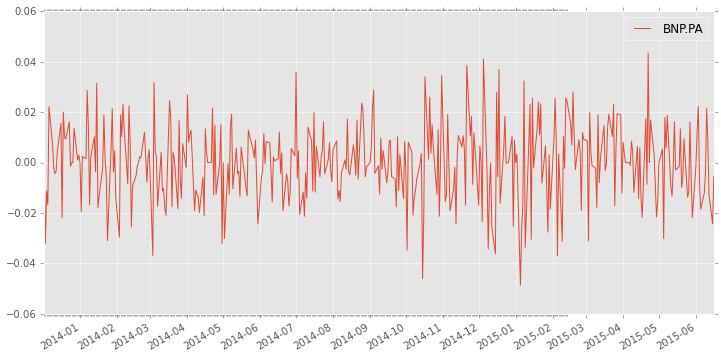

In [ ]:
StockPrices.draw(ret, figsize=(12,6), begin="2013-12-01", date_format="%Y-%m")

### Quelques notions sur les dates

La classe <i>StockPrices</i> utilise les dates sous forme de chaînes de caractères. De cette façon, il n'est pas possible de faire des opérations dessus. Pour ce faire, il faut les convertir en un objet appelé <a href="https://docs.python.org/2/library/datetime.html">datetime</a>.

In [ ]:
from datetime import datetime, timedelta
dt = datetime.strptime("2014-03-31","%Y-%m-%d")
dt

datetime.datetime(2014, 3, 31, 0, 0)

On ajoute un jour :

In [ ]:
delta = timedelta(1)
dt = dt + delta
dt

datetime.datetime(2014, 4, 1, 0, 0)

Puis on convertit dans l'autre sens :

In [ ]:
s = dt.strftime("%Y-%m-%d")
s

'2014-04-01'

### Promenade dans l'index

Il est facile de récupérer les valeurs correspondant à une date précise. Mais comment récupérer la valeur du jour d'après ?

In [ ]:
stock = StockPrices ("GLE.PA", folder = cache)
df = stock.dataframe
print("A",df["2000-01-04":"2000-01-06"])
# print("B",df["2000-01-04"]) # ne fonctionne pas
# print("C",df["2000-01-04","Close"])  #ne fonctionne pas
print("D", df.ix["2000-01-04","Close"])
print("E", df.ix[0,"Close"])
print("F", df.ix[1,"Close"])
print("G", df.index.get_loc("2000-01-06"))  #retourne la position de cette date
print("H", df.ix[df.index.get_loc("2000-01-06")+1,"Close"]) # retourne le Close du lendemain

A                   Date     Open     High      Low    Close  Volume  Adj Close
Date                                                                         
2000-01-04  2000-01-04  210.411  210.884  206.714  210.411  596100   135.4638
2000-01-05  2000-01-05  206.619  210.411  206.619  208.515  290600   134.2431
2000-01-06  2000-01-06  207.093  210.411  206.146  206.619  287800   133.0225
D 210.411
E 211.358
F 210.411
G 3
H 206.619


### Sauver les tables

On peut conserver les données sous forme de fichiers pour les récupérer plus tard.

In [ ]:
stock = StockPrices ("GLE.PA", folder = cache)
stock.dataframe.to_csv("donnees.txt", sep="\t")
os.listdir(".")

['.ipynb_checkpoints',
 'azure_blob_storage.ipynb',
 'cache',
 'dbcc.png',
 'donnees.txt',
 'example_of_ssh_client_communication.ipynb',
 'img_nb_sqlitespy.png',
 'magic_commands_about_files.ipynb',
 'notebook_example.db3',
 'pyensae_flat2db3.ipynb',
 'pyensae_sql_magic.ipynb',
 'pyensae_StockPrices.ipynb',
 'pyensae_text2table.ipynb',
 'pyensae_velib.ipynb',
 'python_hadoop_pig.ipynb',
 'velib_vanves.txt',
 'velib_vanves.zip',
 'view_differences.ipynb']

Le fichier est sauvé. Pour le récupérer avec pandas :

In [ ]:
import pandas
df = pandas.read_csv("donnees.txt",sep="\t")
df.head()

,Date,Date.1,Open,High,Low,Close,Volume,Adj Close
0,2000-01-03,2000-01-03,218.846,219.320,208.989,211.358,254000,136.0735
1,2000-01-04,2000-01-04,210.411,210.884,206.714,210.411,596100,135.4638
2,2000-01-05,2000-01-05,206.619,210.411,206.619,208.515,290600,134.2431
3,2000-01-06,2000-01-06,207.093,210.411,206.146,206.619,287800,133.0225
4,2000-01-07,2000-01-07,205.672,209.463,205.672,206.619,204100,133.0225


Les dates apparaissent deux fois... Si on regarde le fichier sauvé sur disque dur :

In [ ]:
with open("donnees.txt","r") as f : text = f.read()
print(text[:400])

Date	Date	Open	High	Low	Close	Volume	Adj Close
2000-01-03	2000-01-03	218.84599999999998	219.32	208.989	211.358	254000	136.0735
2000-01-04	2000-01-04	210.41099999999997	210.88400000000001	206.71400000000003	210.41099999999997	596100	135.4638
2000-01-05	2000-01-05	206.61900000000003	210.41099999999997	206.61900000000003	208.515	290600	134.2431
2000-01-06	2000-01-06	207.093	210.41099999999997	206.146


Cela est dû au fait que les dates sont à la fois une colonne et servent d'index. Pour éviter de les conserver deux fois, on demande explicitement à ce que l'index ne soit pas ajouté au fichier : 

In [ ]:
stock = StockPrices ("GLE.PA", folder = cache)
stock.dataframe.to_csv("donnees.txt", sep="\t", index=False)

Puis on récupère les données :

In [ ]:
df = pandas.read_csv("donnees.txt",sep="\t")
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2000-01-03,218.846,219.320,208.989,211.358,254000,136.0735
1,2000-01-04,210.411,210.884,206.714,210.411,596100,135.4638
2,2000-01-05,206.619,210.411,206.619,208.515,290600,134.2431
3,2000-01-06,207.093,210.411,206.146,206.619,287800,133.0225
4,2000-01-07,205.672,209.463,205.672,206.619,204100,133.0225


On vérifie le fichier sur disque dur :

In [ ]:
with open("donnees.txt","r") as f : text = f.read()
print(text[:400])

Date	Open	High	Low	Close	Volume	Adj Close
2000-01-03	218.84599999999998	219.32	208.989	211.358	254000	136.0735
2000-01-04	210.41099999999997	210.88400000000001	206.71400000000003	210.41099999999997	596100	135.4638
2000-01-05	206.61900000000003	210.41099999999997	206.61900000000003	208.515	290600	134.2431
2000-01-06	207.093	210.41099999999997	206.146	206.61900000000003	287800	133.0225
2000-01-07	20


C'est mieux.